# Diabetes LightGBM
* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
* The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
* https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?datasetId=228&sortBy=voteCount


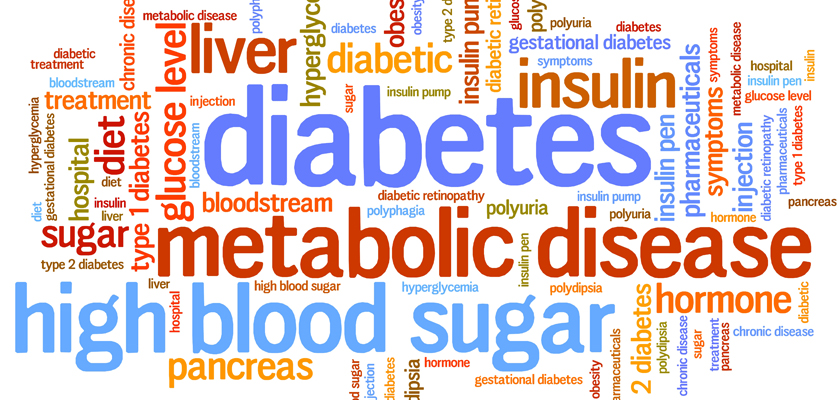

## Analysis Content
1. [Python Libraries](#1)
2. [Reading Data](#2)
3. [Analyzing Outcome](#3)
4. [Train-Test Split](#4)
5. [LightGBM Model](#5)
6. [Model Tuning](#6)
7. [Prediction - Tuned Model](#7)

<a id = '1' ></a>
## Python Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = '2' ></a>
## Reading Data

In [ ]:
diabetes = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

In [ ]:
df.info()

<a id = '3' ></a>
## Analyzing Outcome

In [ ]:
df["Outcome"].value_counts()

In [ ]:
df["Outcome"].value_counts().plot.barh();

In [ ]:
df.describe().T

<a id = '4' ></a>
## Train-Test Split

In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [ ]:
# %70 train %30 test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=1)

<a id = '5' ></a>
## LightGBM Model

In [ ]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

<a id = '6' ></a>
## Model Tuning

In [ ]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [ ]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
# Best parameters are founded with GridSearchCV
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [ ]:
lgbm_tuned = lgbm.fit(X_train,y_train)

<a id = '7' ></a>
## Prediction - Tuned Model

In [ ]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)